## Criação de um modelo de regressão para realizar as previsões de retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade. Através dessas previsões, poderemos avaliar o impacto dos diferentes níveis de investimento em marketing nas vendas, auxiliando na tomada de decisões e na definição de estratégias de negócio

## 1. Importar as Bibliotecas Necessárias

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Carrega e validar a base de dados:

In [30]:
df = pd.read_csv("MKT.csv") # carrega a base

In [31]:
df.describe() #descreve a base

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [32]:
df.info() #verifica se tem valor nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [33]:
df.dtypes #valida o tipo dos dados

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

## 3. Explorar os Dados

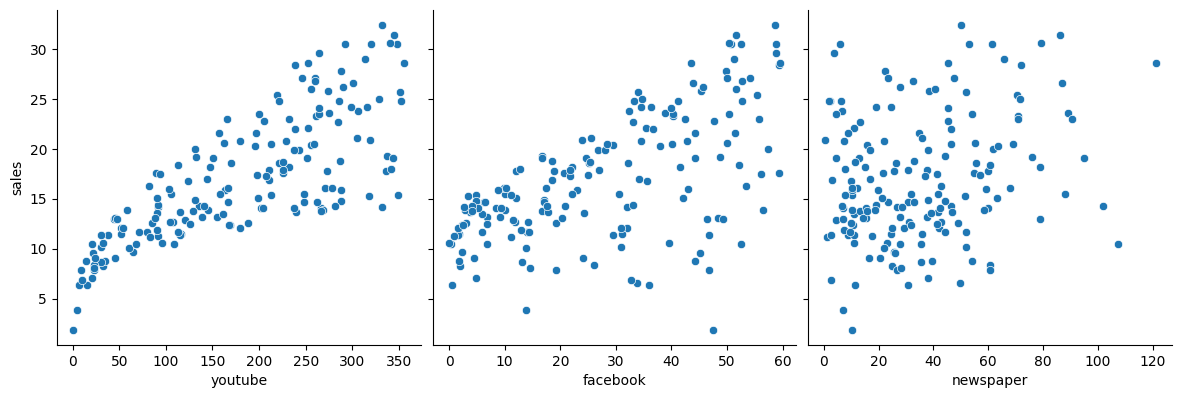

In [41]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

## gera uma matriz de gráficos onde cada célula da matriz é um gráfico de dispersão. Cada gráfico mostra a relação entre uma variável no eixo x e a variável sales no eixo y. Ajuda a identificar padrões, tendências e possíveis outliers.

Verificar entradas com 0: Confirme se as entradas com valores de 0 para facebook são corretas. Pode ser um dado faltante ou uma campanha onde realmente não houve investimento.

Visualizar Outliers: Utilize boxplots para visualizar possíveis outliers em cada uma das variáveis:

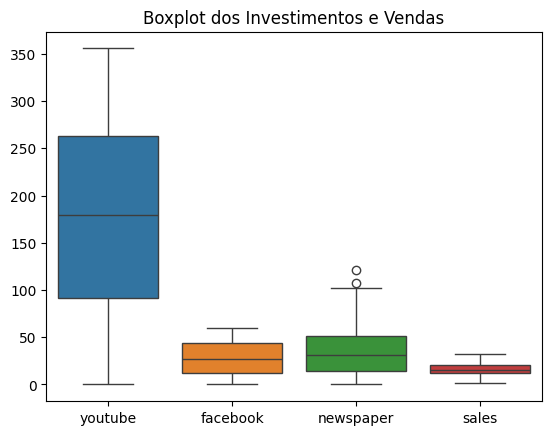

In [40]:
sns.boxplot(data=df[['youtube', 'facebook', 'newspaper', 'sales']])
plt.title('Boxplot dos Investimentos e Vendas')
plt.show()


## 4. Dividir os Dados em Conjunto de Treinamento e Teste

In [35]:
X = df[['youtube', 'facebook', 'newspaper']]  # Variáveis independentes (investimentos)
y = df['sales']  # Variável dependente (vendas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Construir e Treinar o Modelo de Regressão

In [36]:
# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

## 6. Avaliar o Modelo

In [37]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {r2}')

MSE: 4.699445585122349
RMSE: 0.882423505618885


## 7. Fazer Previsões

In [38]:
# Exemplo de novos investimentos para prever as vendas
novos_investimentos = np.array([[300, 400, 100]])
previsao_vendas = model.predict(novos_investimentos)

print(f'Previsão de Vendas: {previsao_vendas}')

Previsão de Vendas: [92.44312998]


C:\Users\tuzzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
